In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [70]:
data['Product'] = data['Product'].replace({'KP281':'A', 'KP481':'B', 'KP781':'C'})

In [71]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,A,18,Male,14,Single,3,4,29562,112
1,A,19,Male,15,Single,2,3,31836,75
2,A,19,Female,14,Partnered,4,3,30699,66
3,A,19,Male,12,Single,3,3,32973,85
4,A,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,C,40,Male,21,Single,6,5,83416,200
176,C,42,Male,18,Single,5,4,89641,200
177,C,45,Male,16,Single,5,5,90886,160
178,C,47,Male,18,Partnered,4,5,104581,120


In [72]:
for i in data.columns:
    print(i,' : ', data[i].nunique())

Product  :  3
Age  :  32
Gender  :  2
Education  :  8
MaritalStatus  :  2
Usage  :  6
Fitness  :  5
Income  :  62
Miles  :  37


Univariate Analysis

In [73]:
contin_columns = ['Age', 'Income', 'Miles']

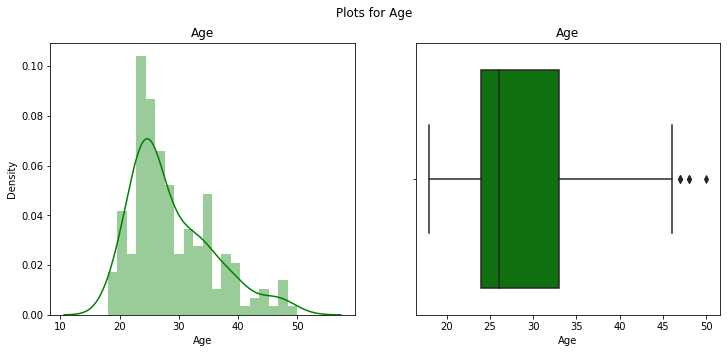

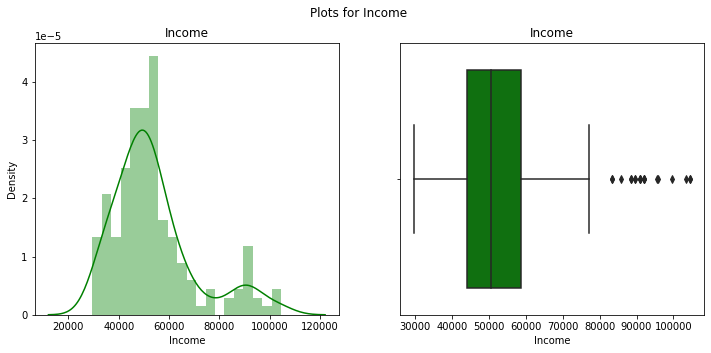

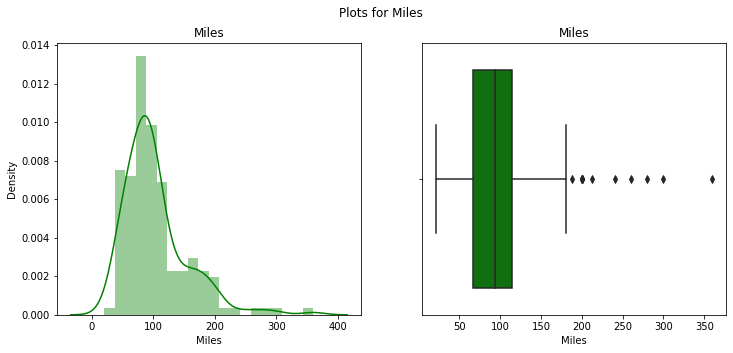

In [74]:
for i in contin_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle('Plots for '+i)
    sns.distplot(data[i],bins=20,ax=ax[0],color='green').set(title = i)
    sns.boxplot(data[i],ax=ax[1],color='green').set(title = i)
    plt.show()

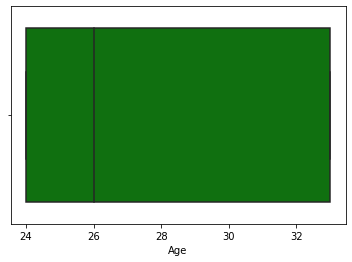

In [60]:
col = 'Age'

data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


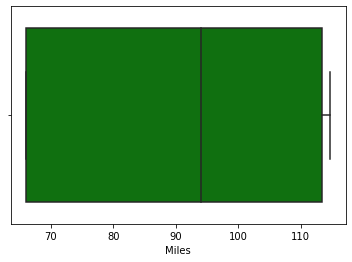

In [61]:
col = 'Miles'
data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


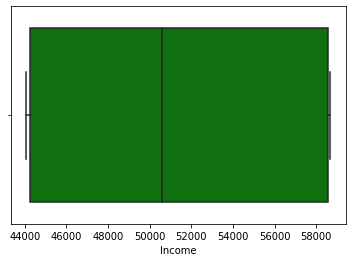

In [62]:
col = 'Income'
data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='green')
plt.show()


In [63]:
data.shape

(180, 9)

In [76]:
cols = ['Miles'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
df = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


Miles    48.75
dtype: float64


In [78]:
df.shape

(167, 9)

<AxesSubplot:ylabel='Frequency'>

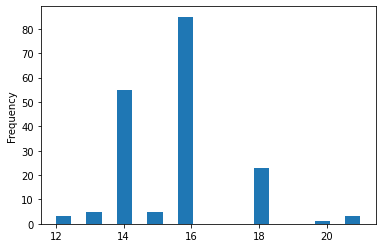

In [44]:
data['Education'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

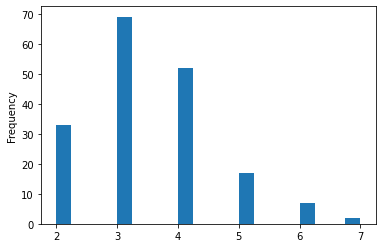

In [45]:
data['Usage'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

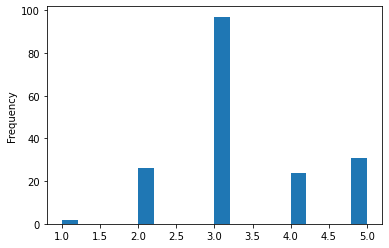

In [46]:
data['Fitness'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

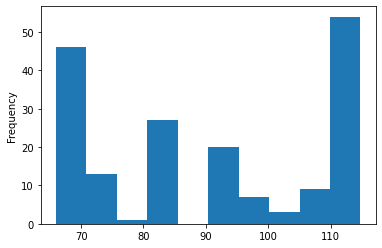

In [48]:
data['Miles'].plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Density'>

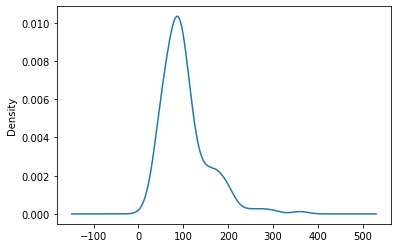

In [12]:
data['Miles'].plot(kind='kde')

<AxesSubplot:xlabel='Gender', ylabel='count'>

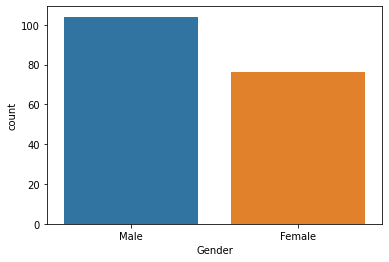

In [20]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

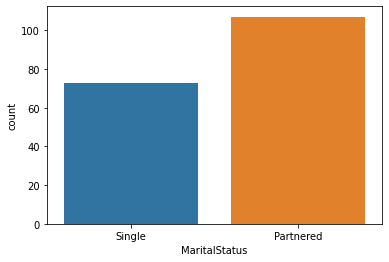

In [21]:
sns.countplot(data['MaritalStatus'])

<AxesSubplot:xlabel='Product', ylabel='count'>

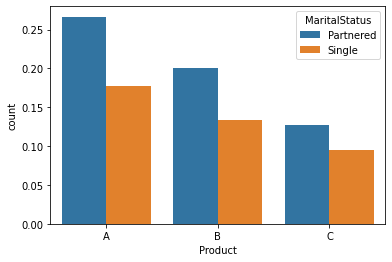

In [104]:
tmp = data[['MaritalStatus','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['MaritalStatus','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='MaritalStatus',y='count',x='Product')

<AxesSubplot:xlabel='Gender', ylabel='count'>

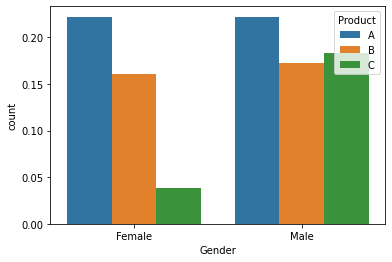

In [115]:
tmp = data[['Gender','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['Gender','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,x='Gender',y='count',hue='Product')

<AxesSubplot:xlabel='new', ylabel='count'>

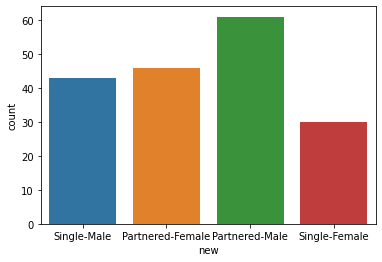

In [22]:
tmp = data[['MaritalStatus','Gender']]
tmp['new'] = tmp['MaritalStatus'] + '-' + tmp['Gender']

sns.countplot(tmp['new'])

Multivariate Analysis

<AxesSubplot:xlabel='new', ylabel='count'>

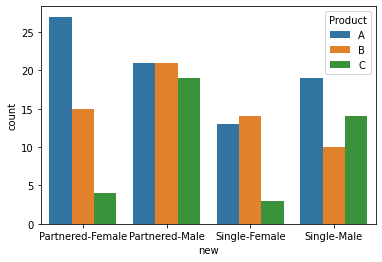

In [23]:
tmp = data[['MaritalStatus','Gender','Product']]
tmp['new'] = tmp['MaritalStatus'] + '-' + tmp['Gender']
tmp['count'] = 1
tmp = tmp.groupby(['new','Product']).count()['count'].reset_index()
tmp
sns.barplot(data=tmp,x='new',hue='Product',y='count')

<AxesSubplot:xlabel='new', ylabel='Income'>

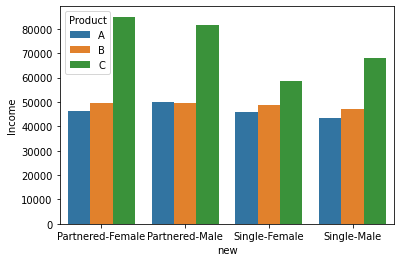

In [110]:
tmp = data[['MaritalStatus','Gender','Product','Income']]
tmp['new'] = tmp['MaritalStatus'] + '-' + tmp['Gender']

tmp = tmp.groupby(['new','Product']).mean()['Income'].reset_index()

sns.barplot(data=tmp,x='new',hue='Product',y='Income')

<AxesSubplot:xlabel='Age_grp', ylabel='count'>

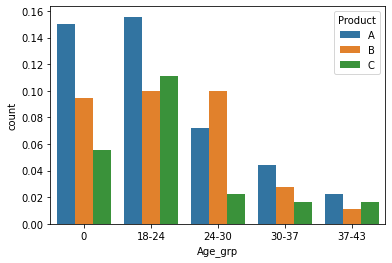

In [105]:
col = 'Age'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Income_grp', ylabel='count'>

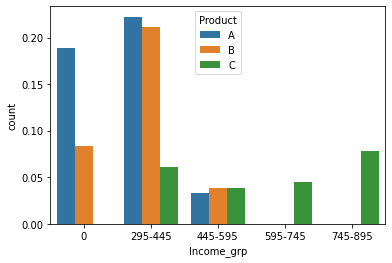

In [106]:
col = 'Income'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1]/100)) + '-' + str(int(grps[i]/100))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Miles_grp', ylabel='count'>

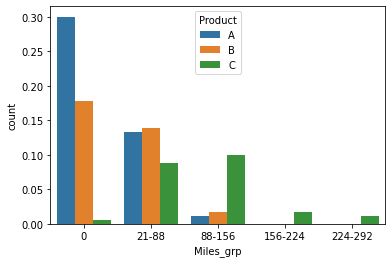

In [107]:
col = 'Miles'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

<AxesSubplot:xlabel='Product', ylabel='count'>

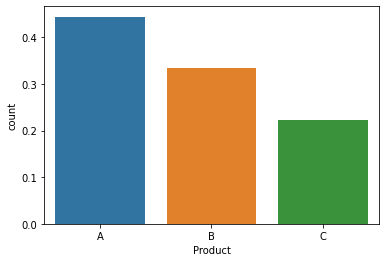

In [113]:
tmp = data[['Product']]
tmp['count'] =1

tmp = tmp.groupby('Product').sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,x='Product',y='count')